In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../input/air-quality-data-in-india/air-quality-india.csv')
data.head(5)

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36192 entries, 0 to 36191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  36192 non-null  object 
 1   Year       36192 non-null  int64  
 2   Month      36192 non-null  int64  
 3   Day        36192 non-null  int64  
 4   Hour       36192 non-null  int64  
 5   PM2.5      36192 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.7+ MB


In [4]:
data2 = data.copy()

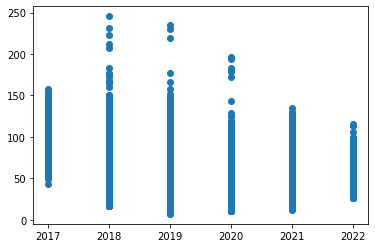

In [5]:
plt.scatter(data.Year,data['PM2.5'])

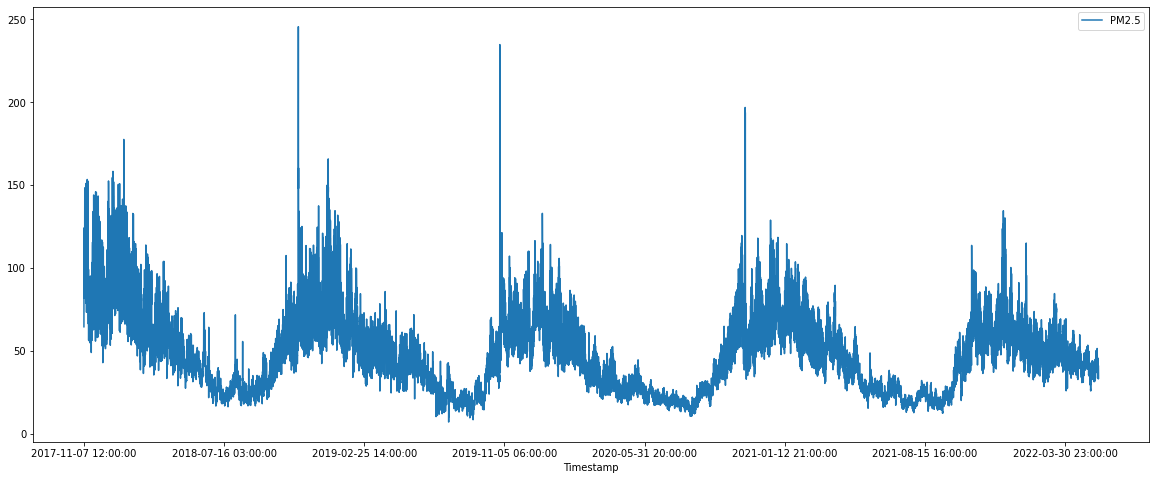

In [6]:
data.plot(x='Timestamp',y='PM2.5',figsize=(20,8))
plt.show()

In [7]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title="Air Quality Profiling Report",explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
data.drop(data.columns[[0]],axis=1,inplace=True)

In [9]:
x = data.drop('PM2.5',axis=1)
y = data['PM2.5']

In [10]:
x

,Year,Month,Day,Hour
0,2017,11,7,12
1,2017,11,7,13
2,2017,11,7,14
3,2017,11,7,15
4,2017,11,7,16
...,...,...,...,...
36187,2022,6,4,11
36188,2022,6,4,12
36189,2022,6,4,13
36190,2022,6,4,14


In [11]:
y

0         64.51
1         69.95
2         92.79
3        109.66
4        116.50
          ...  
36187     35.89
36188     33.83
36189     33.05
36190     35.29
36191     40.67
Name: PM2.5, Length: 36192, dtype: float64

In [12]:
pip install utils

Note: you may need to restart the kernel to use updated packages.


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [14]:
from sklearn.ensemble import RandomForestRegressor
Rmodel = RandomForestRegressor()
Rmodel.fit(X_train,y_train)
Rmodel.score(X_test,y_test)

0.9638254603574166

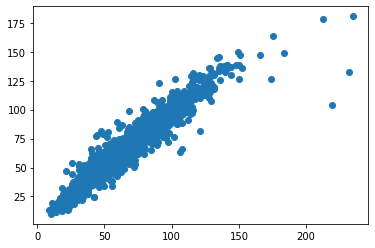

In [15]:
y_pred = Rmodel.predict(X_test)
plt.scatter(y_test,y_pred)
plt.show()

In [16]:
#K nearest neighbors

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(3) # Define classifier
knn.fit(X_train, y_train) # Train model
knn.score(X_test,y_test)

0.8669950865753813

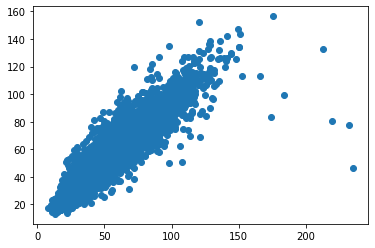

In [17]:
y_pred = knn.predict(X_test)
plt.scatter(y_test,y_pred)
plt.show()

In [18]:
# Decision tree

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5) # Define classifier
dt.fit(X_train, y_train) # Train model
dt.score(X_test,y_test)

0.7600209777931255

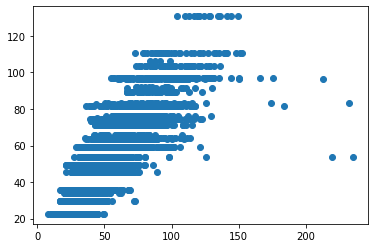

In [19]:
y_pred = dt.predict(X_test)
plt.scatter(y_test,y_pred)
plt.show()

In [20]:
#Neural network

from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(alpha=1, max_iter=1000)
mlp.fit(X_train, y_train)
mlp.score(X_test,y_test)

-0.03352048870504176

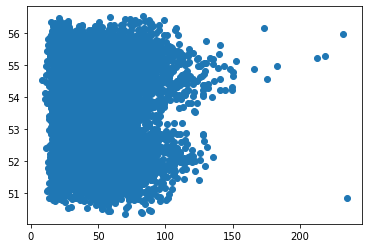

In [21]:
y_pred = mlp.predict(X_test)
plt.scatter(y_test,y_pred)
plt.show()

In [22]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('knn',knn),
    ('dt',dt),
    ('rf',Rmodel),
    ('mlp',mlp) ]

# Build stack model
stack_model = StackingRegressor(
    estimators=estimator_list, final_estimator=RandomForestRegressor())

# Train stacked model
stack_model.fit(X_train, y_train)

StackingRegressor(estimators=[('knn', KNeighborsRegressor(n_neighbors=3)),
                              ('dt', DecisionTreeRegressor(max_depth=5)),
                              ('rf', RandomForestRegressor()),
                              ('mlp', MLPRegressor(alpha=1, max_iter=1000))],
                  final_estimator=RandomForestRegressor())

In [23]:
stack_model.score(X_test,y_test)

0.9591062586508464

In [24]:
y_pred = stack_model.predict(X_test)

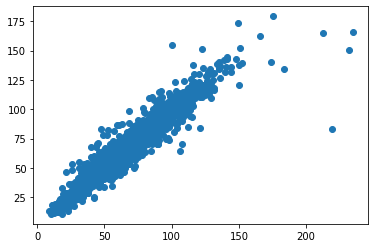

In [25]:
plt.scatter(y_test,y_pred)
plt.show()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36192 entries, 0 to 36191
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    36192 non-null  int64  
 1   Month   36192 non-null  int64  
 2   Day     36192 non-null  int64  
 3   Hour    36192 non-null  int64  
 4   PM2.5   36192 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 1.4 MB


In [27]:
data3 = data2[['Timestamp','PM2.5']]
y_pred = Rmodel.predict(x)
data3['Prediction'] = y_pred
data3.head(3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Timestamp,PM2.5,Prediction
0,2017-11-07 12:00:00,64.51,71.9189
1,2017-11-07 13:00:00,69.95,75.1013
2,2017-11-07 14:00:00,92.79,100.1978


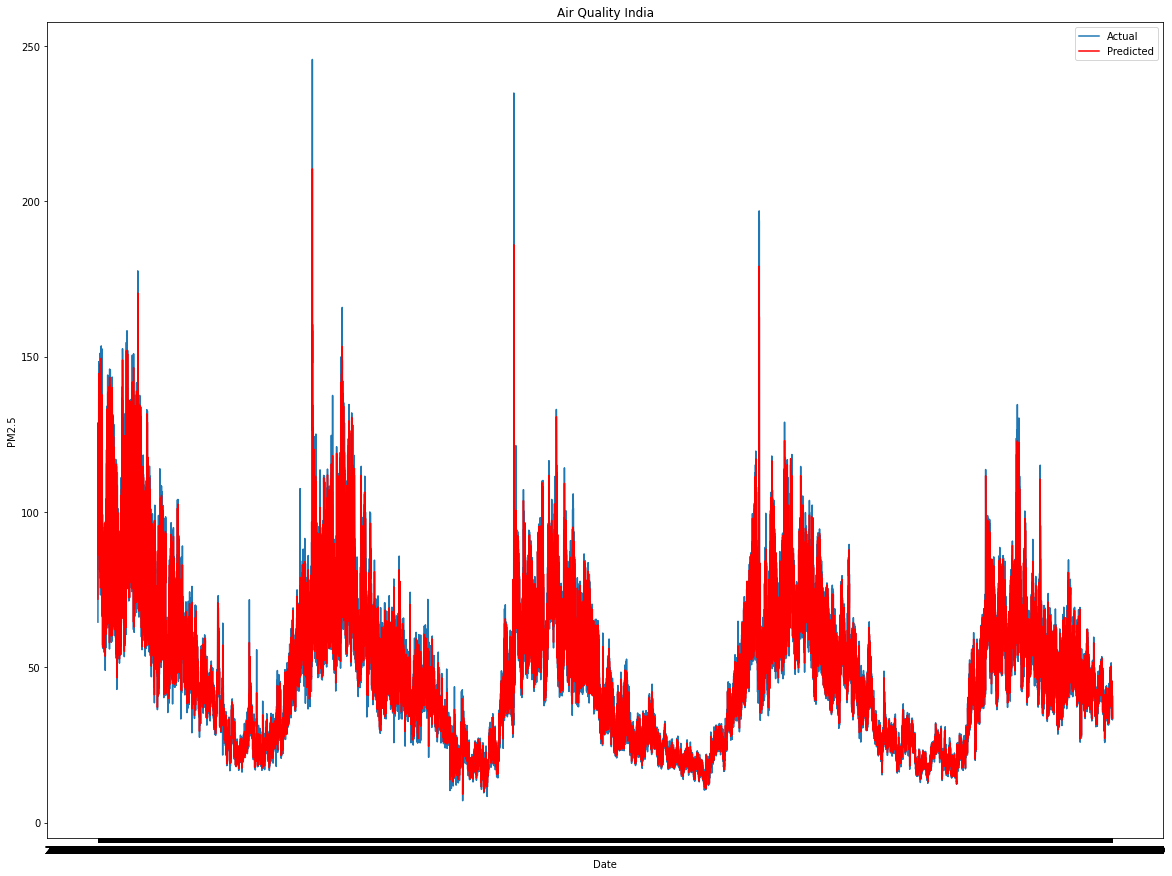

In [28]:
plt.figure(figsize=(20,15))
plt.plot(data3['Timestamp'],data3['PM2.5'],label='Actual')
plt.plot(data3['Timestamp'],data3['Prediction'],label='Predicted',color='r')
plt.title("Air Quality India")
plt.xlabel("Date")
plt.ylabel("PM2.5")
plt.legend()
plt.show()

In [29]:
from tpot import TPOTRegressor

tpot_automl = TPOTRegressor(generations=10, population_size=10, 
                            verbosity=2, scoring='neg_mean_squared_error',   
                            max_time_mins=10, random_state = 669)

In [30]:
tpot_automl.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -37.31292073277016

Generation 2 - Current best internal CV score: -37.31292073277016

Generation 3 - Current best internal CV score: -37.31292073277016

10.58 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.9, learning_rate=0.1, loss=huber, max_depth=9, max_features=0.9000000000000001, min_samples_leaf=3, min_samples_split=15, n_estimators=100, subsample=0.5)


TPOTRegressor(generations=10, max_time_mins=10, population_size=10,
              random_state=669, scoring='neg_mean_squared_error', verbosity=2)

In [31]:
tpot_automl.score(X_test, y_test)

-41.087574010295754

In [32]:
from sklearn.metrics import mean_squared_error

y_pred = tpot_automl.predict(X_test)
mean_squared_error(y_test, y_pred)

41.087574010295754

In [33]:
pip install git+https://github.com/pycaret/pycaret.git

  Cloning https://github.com/pycaret/pycaret.git to /tmp/pip-req-build-buhmv5qt
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-buhmv5qt
  Resolved https://github.com/pycaret/pycaret.git to commit f93e7087a671458a20bed6dd3a8bcca891034cfc
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 995.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - \ | / - done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━

In [34]:
from pycaret.regression import setup, compare_models, predict_model
pycaret_automl = setup(data=data, target = 'PM2.5', session_id=669)

,Description,Value
0,Session id,669
1,Target,PM2.5
2,Target type,Regression
3,Data shape,"(36192, 5)"
4,Train data shape,"(25334, 5)"
5,Test data shape,"(10858, 5)"
6,Numeric features,4
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [35]:
pycaret_models = compare_models(sort='MSE', budget_time=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.8873,23.9500,4.8856,0.9609,0.0806,0.0571,0.8440
rf,Random Forest Regressor,3.0273,26.4322,5.1324,0.9568,0.0851,0.0607,1.0980
xgboost,Extreme Gradient Boosting,4.2083,41.1961,6.4033,0.9327,0.1177,0.0911,0.5950
dt,Decision Tree Regressor,3.6396,42.8038,6.5144,0.9299,0.1066,0.0720,0.0360
catboost,CatBoost Regressor,4.6423,48.6442,6.9591,0.9206,0.1289,0.1012,3.2060
lightgbm,Light Gradient Boosting Machine,5.2490,57.6869,7.5832,0.9058,0.1440,0.1163,0.1760
knn,K Neighbors Regressor,6.0271,76.0904,8.7132,0.8757,0.1652,0.1335,0.0550
gbr,Gradient Boosting Regressor,7.0694,98.0589,9.8947,0.8397,0.1883,0.1570,0.3620
ada,AdaBoost Regressor,10.9873,200.4312,14.1548,0.6718,0.2908,0.2747,0.1180
lar,Least Angle Regression,19.7097,577.5669,24.0278,0.0549,0.5078,0.5354,0.0240


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [36]:
print(pycaret_models)

ExtraTreesRegressor(n_jobs=-1, random_state=669)


In [37]:
from sklearn.ensemble import ExtraTreesRegressor
model_2 = ExtraTreesRegressor(n_jobs=-1, random_state=669)
model_2.fit(X_train,y_train)
model_2.score(X_test,y_test)

0.9683906035910715

In [38]:
pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.4/210.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.8/410.8 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.7/74.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [39]:
from autogluon.tabular import TabularPredictor
autogluon_automl = TabularPredictor(label='PM2.5', problem_type='regression', eval_metric='mean_squared_error')
autogluon_automl.fit(train_data=data, time_limit=5*60)

No path specified. Models will be saved in: "AutogluonModels/ag-20220814_054605/"
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels/ag-20220814_054605/"
AutoGluon Version:  0.5.2
Python Version:     3.7.12
Operating System:   Linux
Train Data Rows:    36192
Train Data Columns: 4
Label Column: PM2.5
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    14641.99 MB
	Train Data (Original)  Memory Usage: 1.16 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Types of features in original data (raw 

[1000]	valid_set's l2: 80.5097
[2000]	valid_set's l2: 75.1864
[3000]	valid_set's l2: 72.3007
[4000]	valid_set's l2: 70.8447
[5000]	valid_set's l2: 69.7324
[6000]	valid_set's l2: 68.9643
[7000]	valid_set's l2: 68.3346
[8000]	valid_set's l2: 67.7538
[9000]	valid_set's l2: 67.351
[10000]	valid_set's l2: 66.9664


	-66.9586	 = Validation score   (-mean_squared_error)
	20.11s	 = Training   runtime
	2.38s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 275.72s of the 275.72s of remaining time.


[1000]	valid_set's l2: 36.1344
[2000]	valid_set's l2: 29.3876
[3000]	valid_set's l2: 25.9696
[4000]	valid_set's l2: 23.8467
[5000]	valid_set's l2: 22.5759
[6000]	valid_set's l2: 21.8813
[7000]	valid_set's l2: 21.2591
[8000]	valid_set's l2: 20.6718
[9000]	valid_set's l2: 20.1819
[10000]	valid_set's l2: 19.8361


	-19.8361	 = Validation score   (-mean_squared_error)
	13.69s	 = Training   runtime
	0.89s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 260.26s of the 260.26s of remaining time.
	-19.1594	 = Validation score   (-mean_squared_error)
	5.42s	 = Training   runtime
	0.2s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 253.77s of the 253.77s of remaining time.
	-27.4868	 = Validation score   (-mean_squared_error)
	112.9s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 140.83s of the 140.82s of remaining time.
	-21.7575	 = Validation score   (-mean_squared_error)
	3.21s	 = Training   runtime
	0.2s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 136.51s of the 136.51s of remaining time.
	-81.5854	 = Validation score   (-mean_squared_error)
	39.66s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: XGBoost ... Training mode

In [40]:
autogluon_automl.leaderboard()

                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2 -16.787019       5.273860   86.862135                0.000476           0.290159            2       True         12
1       RandomForestMSE -19.159403       0.204672    5.417445                0.204672           5.417445            1       True          5
2              LightGBM -19.836100       0.892637   13.693687                0.892637          13.693687            1       True          4
3               XGBoost -20.433279       3.971859   64.245859                3.971859          64.245859            1       True          9
4         ExtraTreesMSE -21.757544       0.204216    3.214984                0.204216           3.214984            1       True          7
5              CatBoost -27.486771       0.015285  112.900763                0.015285         112.900763            1       True          6
6        KNeighborsD

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-16.787019,5.273860,86.862135,0.000476,0.290159,2,True,12
1,RandomForestMSE,-19.159403,0.204672,5.417445,0.204672,5.417445,1,True,5
2,LightGBM,-19.836100,0.892637,13.693687,0.892637,13.693687,1,True,4
3,XGBoost,-20.433279,3.971859,64.245859,3.971859,64.245859,1,True,9
4,ExtraTreesMSE,-21.757544,0.204216,3.214984,0.204216,3.214984,1,True,7
5,CatBoost,-27.486771,0.015285,112.900763,0.015285,112.900763,1,True,6
6,KNeighborsDist,-56.263292,0.023268,0.044694,0.023268,0.044694,1,True,2
7,KNeighborsUnif,-56.757137,0.032732,0.771274,0.032732,0.771274,1,True,1
8,LightGBMXT,-66.958622,2.378328,20.105067,2.378328,20.105067,1,True,3
9,LightGBMLarge,-80.485672,0.006020,0.571016,0.006020,0.571016,1,True,11


In [41]:
autogluon_automl.evaluate(data)

Evaluation: mean_squared_error on test data: -4.358324199669429
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "mean_squared_error": -4.358324199669429,
    "root_mean_squared_error": -2.0876599818144306,
    "mean_absolute_error": -1.2877963197231292,
    "r2": 0.9929497156822554,
    "pearsonr": 0.9965038562345248,
    "median_absolute_error": -0.844629211425783
}


{'mean_squared_error': -4.358324199669429,
 'root_mean_squared_error': -2.0876599818144306,
 'mean_absolute_error': -1.2877963197231292,
 'r2': 0.9929497156822554,
 'pearsonr': 0.9965038562345248,
 'median_absolute_error': -0.844629211425783}

<AxesSubplot:>

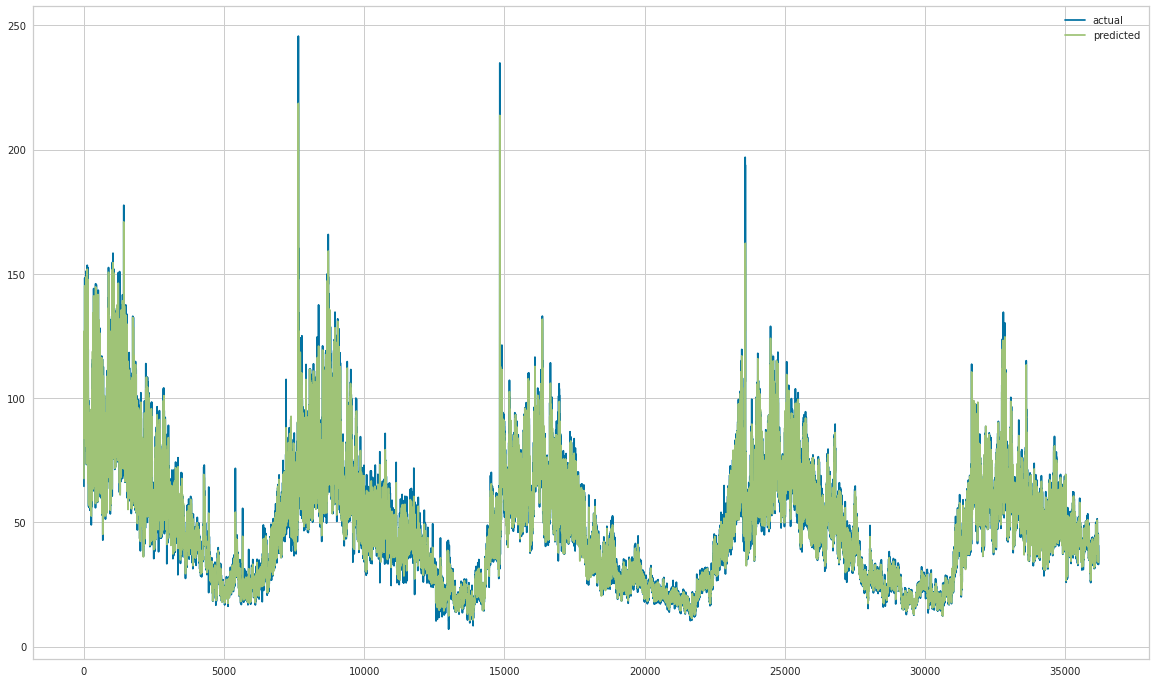

In [42]:
y_pred = autogluon_automl.predict(data)
autogluon_compare = pd.DataFrame(data={'actual': data['PM2.5'], 'predicted': y_pred})
autogluon_compare.plot(figsize=(20, 12))

In [43]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.20.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.20.04.1, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpqkga5o1k
  JVM stdout: /tmp/tmpqkga5o1k/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpqkga5o1k/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,1 month and 5 days
H2O_cluster_name:,H2O_from_python_unknownUser_oq2gwv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4.396 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [44]:
h2o_frame = h2o.H2OFrame(data)
x = h2o_frame.columns
y = 'PM2.5'
x.remove(y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [45]:
h2o_automl = H2OAutoML(sort_metric='mse', max_runtime_secs=5*60, seed=667)
h2o_automl.train(x=x, y=y, training_frame=h2o_frame)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_3_AutoML_1_20220814_55251

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 11.469569156537098
RMSE: 3.386675236354543
MAE: 2.2435999583953805
RMSLE: 0.06399021331917856
R^2: 0.9809961483423298
Mean Residual Deviance: 11.469569156537098
Null degrees of freedom: 10045
Residual degrees of freedom: 10040
Null deviance: 6063450.738404639
Residual deviance: 115223.29174657169
AIC: 53032.512766040425

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 28.695181227752013
RMSE: 5.356788331430692
MAE: 3.3937707424545898
RMSLE: 0.09617692265753575
R^2: 0.9535809689621056
Mean Residual Deviance: 28.695181227752013
Null degrees of freedom: 36191
Residual degrees of freedom: 36186
Null deviance: 22375538.34

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,3.393069e+00,0.049641,3.321486e+00,3.407987e+00,3.420570e+00,3.366852e+00,3.448447e+00
1,mean_residual_deviance,2.869303e+01,1.307999,2.662683e+01,2.930899e+01,2.973464e+01,2.818095e+01,2.961373e+01
2,mse,2.869303e+01,1.307999,2.662683e+01,2.930899e+01,2.973464e+01,2.818095e+01,2.961373e+01
3,null_deviance,4.475108e+06,81916.016000,4.447751e+06,4.475298e+06,4.500354e+06,4.363256e+06,4.588880e+06
4,r2,9.535791e-01,0.001850,9.566253e-01,9.527932e-01,9.516447e-01,9.533875e-01,9.534450e-01
5,residual_deviance,2.077020e+05,9850.432000,1.927250e+05,2.111713e+05,2.175981e+05,2.033819e+05,2.136335e+05
6,rmse,5.355454e+00,0.123212,5.160120e+00,5.413778e+00,5.452948e+00,5.308573e+00,5.441850e+00
7,rmsle,9.611719e-02,0.001098,9.445709e-02,9.608341e-02,9.643672e-02,9.609145e-02,9.751730e-02


In [46]:
h2o_models = h2o.automl.get_leaderboard(h2o_automl, extra_columns = "ALL")
h2o_models

model_id,mse,rmse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_3_AutoML_1_20220814_55251,28.6952,5.35679,3.39377,0.0961769,28.6952,1088,0.031102,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20220814_55251,30.3497,5.50906,3.5615,0.102938,30.3497,711,0.032223,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20220814_55251,30.3554,5.50957,3.56182,0.102946,30.3554,788,0.0276,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20220814_55251,30.7466,5.54496,3.60393,0.104669,30.7466,726,0.027571,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20220814_55251,30.7471,5.54501,3.60413,0.104672,30.7471,613,0.026285,StackedEnsemble
DRF_1_AutoML_1_20220814_55251,35.0582,5.92099,3.94514,0.119792,35.0582,5336,0.022897,DRF
GBM_4_AutoML_1_20220814_55251,37.9446,6.15992,4.00842,0.112929,37.9446,2016,0.023235,GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20220814_55251,38.2174,6.18202,3.99239,0.11093,38.2174,1069,0.026303,StackedEnsemble
XGBoost_2_AutoML_1_20220814_55251,38.7457,6.2246,4.04783,0.113637,38.7457,2678,0.010508,XGBoost
XGBoost_1_AutoML_1_20220814_55251,39.5512,6.28898,4.13691,0.116314,39.5512,4935,0.015818,XGBoost


In [47]:
from h2o.model.regression import h2o_mean_squared_error,h2o_explained_variance_score

h2o_frame_test = h2o.H2OFrame(data)

y_pred = h2o_automl.predict(h2o_frame_test)
y_actual = h2o.H2OFrame(data[['PM2.5']])

h2o_mean_squared_error(y_actual, y_pred)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


12.098884635639944

In [48]:
h2o_explained_variance_score(y_actual,y_pred)

0.9804677474509105

In [49]:
y_pred = h2o.as_list(y_pred)
type(y_pred)

pandas.core.frame.DataFrame

In [50]:
y_pred = y_pred.values.flatten()
y_pred.shape

(36192,)

<AxesSubplot:>

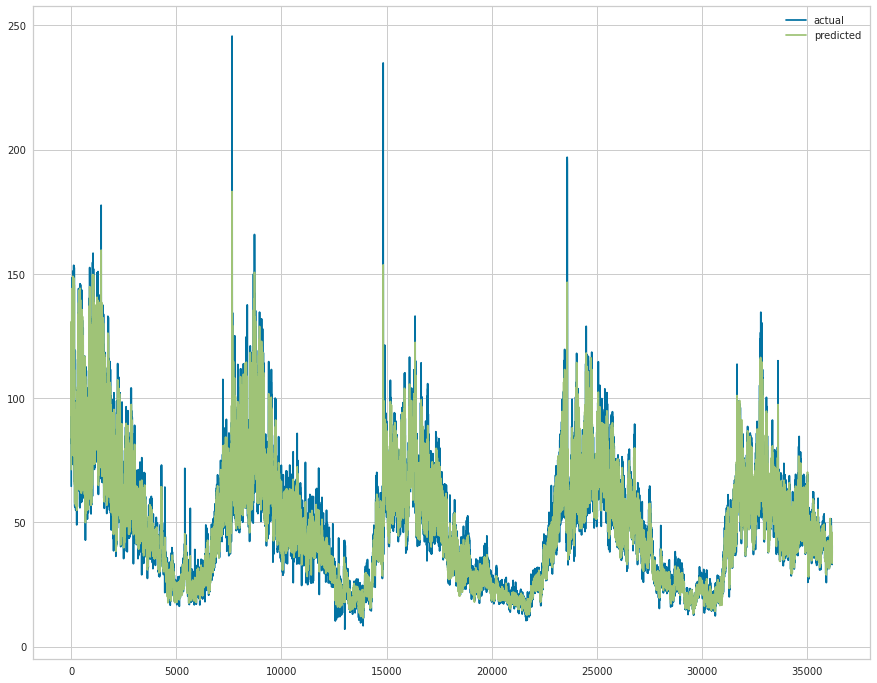

In [51]:
h2o_model = pd.DataFrame(data={'actual': data['PM2.5'], 'predicted': y_pred})
h2o_model.plot(figsize=(15, 12))